In [4]:
import numpy as np
import itertools
import pandas as pd
import os 
import jax.numpy as jnp

# print(jnp.logspace(-6, -1, 15)[:])

devs = np.logspace(-6, -1, 15)[:]

print([dev for dev in devs])

# print(os.listdir("../../results/Gaussian_MAMS_Paper"))
integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    # f"adjusted_microcanonical_{integrator_type}", 
    # f"unadjusted_microcanonical__{integrator_type}",
    f"underdamped_langevin_{dev}",
    # f"adjusted_hmc_{integrator_type}",
    # f"adjusted_malt",
    

                
                ] for dev in devs]

samplers = [
    x
    for xs in samplers
    for x in xs
]

print(samplers)

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]


# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Rosenbrock_{D*2}" for D in Ds]


models = [f"ICG"]



df_tuned = pd.concat([pd.read_csv(f"../../results/Gaussian_MAMS_Paper/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)
df_tuned_brownian = pd.concat([pd.read_csv(f"../../results/vector_brownian_motion_unknown_scales_missing_middle_observations/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, ["vector_brownian_motion_unknown_scales_missing_middle_observations"])], ignore_index=True)
# df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned_brownian

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

# df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)
df['dev'] = df['Sampler'].apply(lambda x: float(x.split('_')[-1]))
df = df[df["max"] == False]
df = df[(df["statistic"] == 'square') | (df['statistic'] == 'x2') ]
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
# df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
# df['Sampler'] = df['Sampler'].apply({
#     'unadjusted_microcanonical__velocity_verlet': 'unadjusted_microcanonical_velocity_verlet',
#     'adjusted_microcanonical_velocity_verlet': 'adjusted_microcanonical_velocity_verlet',
#     'underdamped_langevin_velocity_verlet': 'underdamped_langevin_velocity_verlet',
#     'adjusted_hmc_velocity_verlet': 'adjusted_hmc_velocity_verlet',
#     'adjusted_malt': 'adjusted_malt',
# }.get)
df['ESS'] = 100/df["num_grads_to_low_error"]
df[df['Integrator']=='velocity_verlet']
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']

df

[1e-06, 2.2758459260747865e-06, 5.179474679231212e-06, 1.1787686347935867e-05, 2.6826957952797274e-05, 6.105402296585326e-05, 0.00013894954943731373, 0.00031622776601683794, 0.0007196856730011522, 0.0016378937069540646, 0.0037275937203149418, 0.008483428982440725, 0.019306977288832496, 0.04393970560760795, 0.1]
['underdamped_langevin_1e-06', 'underdamped_langevin_2.2758459260747865e-06', 'underdamped_langevin_5.179474679231212e-06', 'underdamped_langevin_1.1787686347935867e-05', 'underdamped_langevin_2.6826957952797274e-05', 'underdamped_langevin_6.105402296585326e-05', 'underdamped_langevin_0.00013894954943731373', 'underdamped_langevin_0.00031622776601683794', 'underdamped_langevin_0.0007196856730011522', 'underdamped_langevin_0.0016378937069540646', 'underdamped_langevin_0.0037275937203149418', 'underdamped_langevin_0.008483428982440725', 'underdamped_langevin_0.019306977288832496', 'underdamped_langevin_0.04393970560760795', 'underdamped_langevin_0.1']


,Unnamed: 0,Sampler,Model,num_grads_to_low_error,ess_corr,max,statistic,num_tuning_grads,L,step_size,dev,Integrator,ESS
3,3,underdamped_langevin_1e-06,vector_brownian_motion_unknown_scales_missing_...,11082.0,NaN,False,square,208889.0,1.0,0.052654,0.000001,1e-06,0.009024
11,3,underdamped_langevin_2.2758459260747865e-06,vector_brownian_motion_unknown_scales_missing_...,9124.0,NaN,False,square,208889.0,1.0,0.060924,0.000002,2.2758459260747865e-06,0.010960
19,3,underdamped_langevin_5.179474679231212e-06,vector_brownian_motion_unknown_scales_missing_...,8462.0,NaN,False,square,208889.0,1.0,0.068126,0.000005,5.179474679231212e-06,0.011818
27,3,underdamped_langevin_1.1787686347935867e-05,vector_brownian_motion_unknown_scales_missing_...,7117.0,NaN,False,square,208889.0,1.0,0.077218,0.000012,1.1787686347935867e-05,0.014051
35,3,underdamped_langevin_2.6826957952797274e-05,vector_brownian_motion_unknown_scales_missing_...,6130.0,NaN,False,square,208889.0,1.0,0.088531,0.000027,2.6826957952797274e-05,0.016313
43,3,underdamped_langevin_6.105402296585326e-05,vector_brownian_motion_unknown_scales_missing_...,5445.0,NaN,False,square,208889.0,1.0,0.101311,0.000061,6.105402296585326e-05,0.018365
51,3,underdamped_langevin_0.00013894954943731373,vector_brownian_motion_unknown_scales_missing_...,4508.0,NaN,False,square,208889.0,1.0,0.117162,0.000139,0.00013894954943731373,0.022183
59,3,underdamped_langevin_0.00031622776601683794,vector_brownian_motion_unknown_scales_missing_...,4253.0,NaN,False,square,208889.0,1.0,0.131881,0.000316,0.00031622776601683794,0.023513
67,3,underdamped_langevin_0.0007196856730011522,vector_brownian_motion_unknown_scales_missing_...,3452.0,NaN,False,square,208889.0,1.0,0.155029,0.000720,0.0007196856730011522,0.028969
75,3,underdamped_langevin_0.0016378937069540646,vector_brownian_motion_unknown_scales_missing_...,3476.0,NaN,False,square,208889.0,1.0,0.176141,0.001638,0.0016378937069540646,0.028769


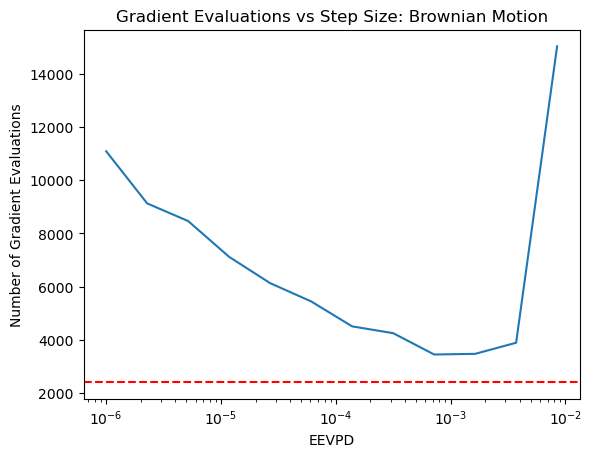

In [7]:
# plot num_grads_to_low_error against sampler
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df,x='dev', y='num_grads_to_low_error')
# log x axis
plt.xscale('log')
# x label
plt.xlabel('EEVPD')
plt.ylabel('Number of Gradient Evaluations')
plt.title('Gradient Evaluations vs Desired EEVPD: Brownian Motion')

# horizontal line at 1142
plt.axhline(y=2407, color='r', linestyle='--')
plt.show()

